In [11]:
using LibPQ, Tables, Plotly, HTTP, CSV

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278


In [10]:
import Pkg; Pkg.add("CSV")

  Resolving package versions...
  Installed Missings ────────── v0.4.4
  Installed InvertedIndices ─── v1.0.0
  Installed SentinelArrays ──── v1.2.16
  Installed Compat ──────────── v3.23.0
  Installed CategoricalArrays ─ v0.8.3
  Installed DataStructures ──── v0.18.8
  Installed DataFrames ──────── v0.21.8
  Installed SortingAlgorithms ─ v0.3.1
  Installed PooledArrays ────── v0.5.3
  Installed StructTypes ─────── v1.1.0
  Installed CSV ─────────────── v0.7.7
Updating `~/.julia/environments/v1.5/Project.toml`
  [336ed68f] + CSV v0.7.7
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [336ed68f] + CSV v0.7.7
  [324d7699] + CategoricalArrays v0.8.3
  [34da2185] + Compat v3.23.0
  [a93c6f00] + DataFrames v0.21.8
  [864edb3b] + DataStructures v0.18.8
  [41ab1584] + InvertedIndices v1.0.0
  [e1d29d7a] + Missings v0.4.4
  [2dfb63ee] + PooledArrays v0.5.3
  [91c51154] + SentinelArrays v1.2.16
  [a2af1166] + SortingAlgorithms v0.3.1
  [856f2bd8] + StructTypes v1.1.0
  [9fa8497b] + Future


In [17]:
conn = LibPQ.Connection("dbname=sharath")

PostgreSQL connection (CONNECTION_OK) with parameters:
  user = sharath
  passfile = /home/sharath/.pgpass
  dbname = sharath
  port = 5432
  client_encoding = UTF8
  options = -c DateStyle=ISO,YMD -c IntervalStyle=iso_8601 -c TimeZone=UTC
  application_name = LibPQ.jl
  sslmode = prefer
  sslcompression = 0
  gssencmode = disable
  krbsrvname = postgres
  target_session_attrs = any

In [19]:
result = execute(conn, """select "NDP_Date" , "NDP_Close" from ace_equity_nifty_50 aen where "Company Name" = 'Infosys Ltd.' order by 1""")
data = columntable(result)

(NDP_Date = Union{Missing, Dates.DateTime}[Dates.DateTime("2011-10-03T00:00:00"), Dates.DateTime("2011-10-04T00:00:00"), Dates.DateTime("2011-10-05T00:00:00"), Dates.DateTime("2011-10-07T00:00:00"), Dates.DateTime("2011-10-10T00:00:00"), Dates.DateTime("2011-10-11T00:00:00"), Dates.DateTime("2011-10-12T00:00:00"), Dates.DateTime("2011-10-13T00:00:00"), Dates.DateTime("2011-10-14T00:00:00"), Dates.DateTime("2011-10-17T00:00:00")  …  Dates.DateTime("2020-10-05T00:00:00"), Dates.DateTime("2020-10-06T00:00:00"), Dates.DateTime("2020-10-07T00:00:00"), Dates.DateTime("2020-10-08T00:00:00"), Dates.DateTime("2020-10-09T00:00:00"), Dates.DateTime("2020-10-12T00:00:00"), Dates.DateTime("2020-10-13T00:00:00"), Dates.DateTime("2020-10-14T00:00:00"), Dates.DateTime("2020-10-15T00:00:00"), Dates.DateTime("2020-10-16T00:00:00")], NDP_Close = Union{Missing, Float64}[309.49, 304.81, 305.87, 313.59, 323.74, 313.07, 334.92, 337.09, 342.97, 343.32  …  1048.7, 1055.75, 1066.55, 1093.7, 1106.8, 1132.1, 1157

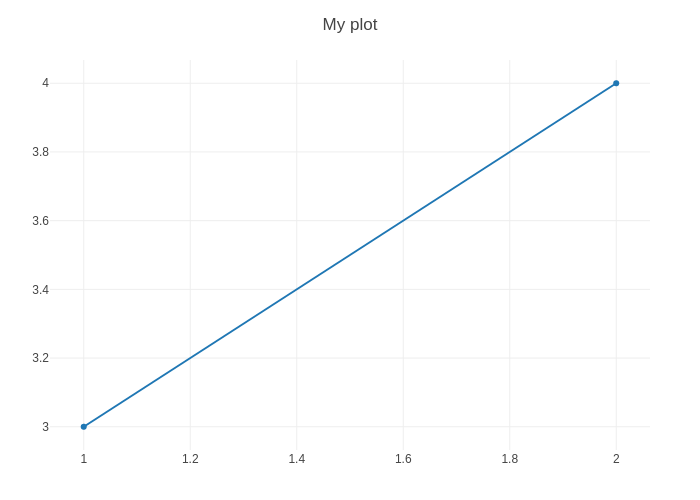

In [2]:
my_plot = plot([scatter(x=[1,2], y=[3,4])], Layout(title="My plot"))


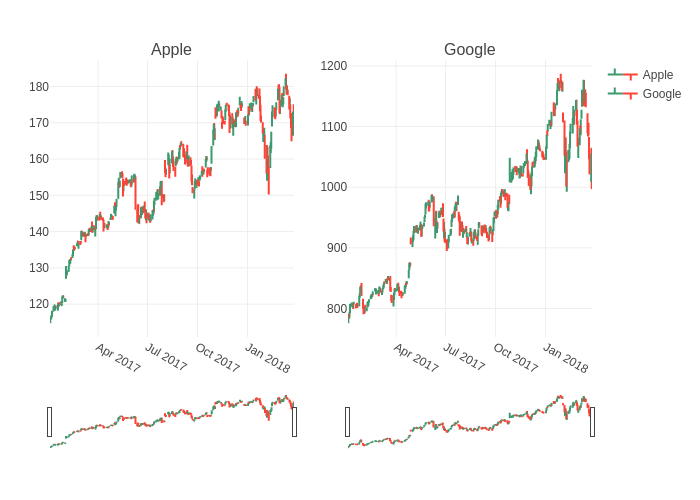

In [13]:
function ohlc2()
    function get_ohlc(ticker; kwargs...)
        res = HTTP.get("https://www.quandl.com/api/v3/datasets/WIKI/$(ticker)/data.csv?start_date=2017-01-01")
        df = CSV.read(res.body)
        ohlc(df, x=:Date, open=:Open, high=:High, low=:Low, close=:Close; kwargs...)
    end

    p1 = plot(get_ohlc("AAPL", name="Apple"), Layout(title="Apple"))
    p2 = plot(get_ohlc("GOOG", name="Google"), Layout(title="Google"))

    [p1 p2]
end
ohlc2()

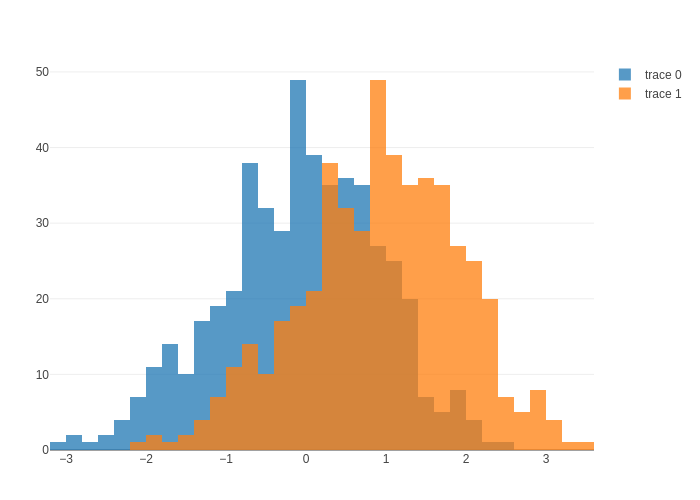

In [14]:
function two_hists()
    x0 = randn(500)
    x1 = x0 .+ 1

    trace1 = histogram(x=x0, opacity=0.75)
    trace2 = histogram(x=x1, opacity=0.75)
    data = [trace1, trace2]
    layout = Layout(barmode="overlay")
    plot(data, layout)
end
two_hists()